# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

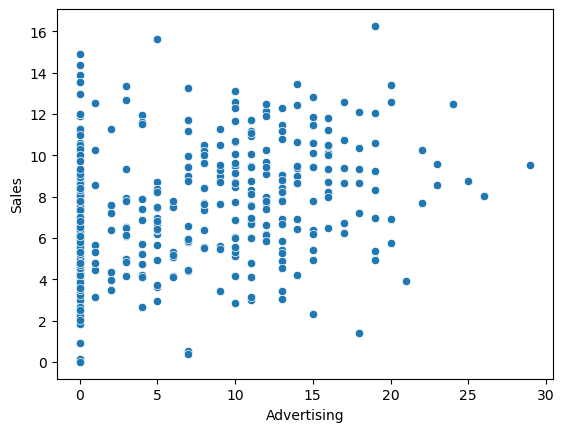

In [4]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

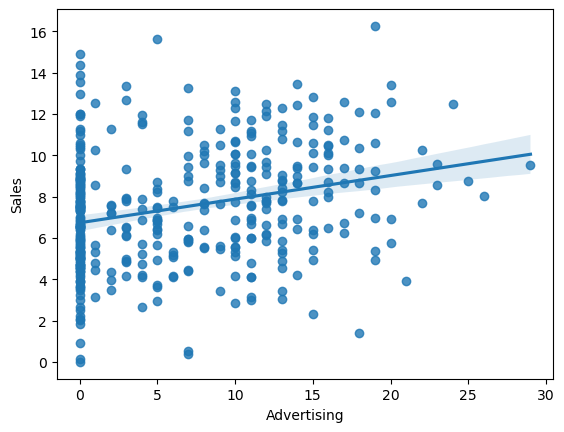

In [6]:
sns.regplot(x=var, y = target, data = data)
plt.show()

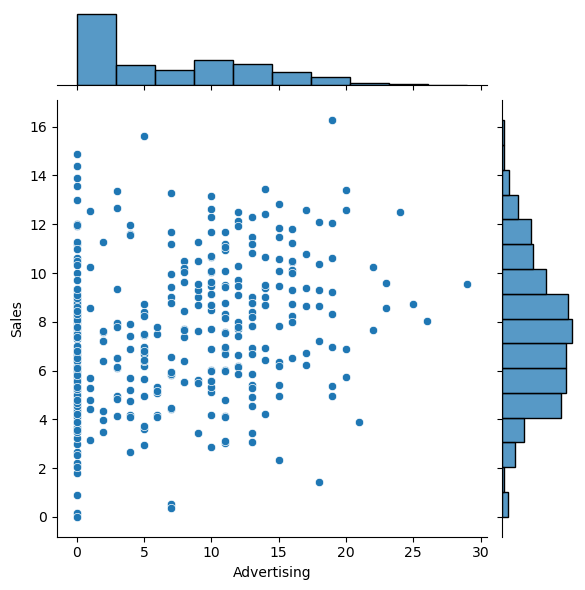

In [7]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}') # f-string

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 양의 상관관계가 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

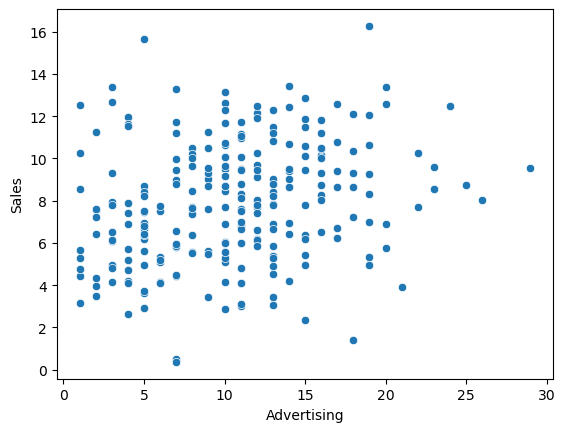

In [8]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [9]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


- 아까와 상관계수 별 차이 X

### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

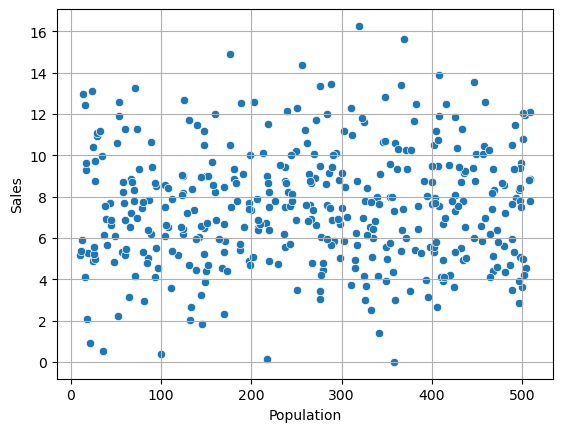

In [10]:
sns.scatterplot(x = 'Population', y = 'Sales', data = data)
plt.grid()
plt.show()

2) 수치화 : 상관분석

In [11]:
result = spst.pearsonr(data['Population'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.31398160931904856


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- p-value 0.05보다 큼 -> 상관계수 못 미더움 (인구수와 판매량은 관계 X)
- 그 지역의 인구수뿐만 아니라 인구 분포(카시트 구매할 잠재고객(부모인 20대 후반-40대 초반))를 봐야 함 -> 가설 갱신하고 새로운 데이터 Age를 살펴보자

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

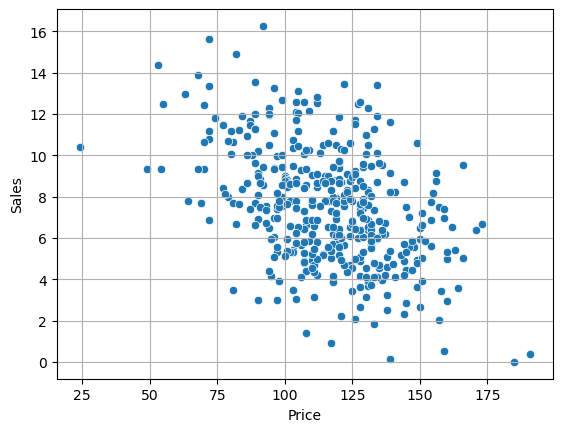

In [12]:
sns.scatterplot(x = 'Price', y = 'Sales', data = data)
plt.grid()
plt.show()

2) 수치화 : 상관분석

In [13]:
result = spst.pearsonr(data['Price'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465726, p-value : 7.618187011913169e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 음의 상관관계를 보임

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

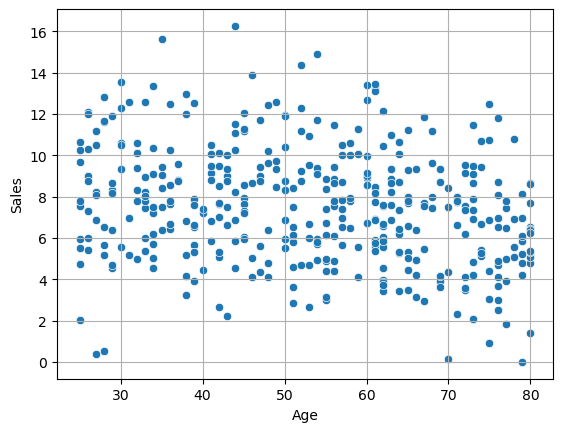

In [14]:
sns.scatterplot(x = 'Age', y = 'Sales', data = data) # Age는 지역의 평균 연령일 것임
plt.grid()
plt.show()

2) 수치화 : 상관분석

In [15]:
result = spst.pearsonr(data['Age'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.2318154396045765, p-value : 2.7889498393714038e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 약한 상관관계
- 평균연령이 20대..? 대학가인가?, 80대..? 실버타운인가?

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

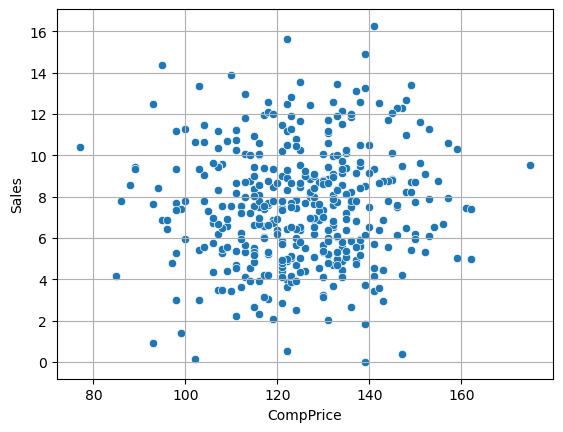

In [16]:
sns.scatterplot(x = 'CompPrice', y = 'Sales', data = data)
plt.grid()
plt.show()

2) 수치화 : 상관분석

In [17]:
result = spst.pearsonr(data['CompPrice'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.2009398289418404


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- p-value 0.05 이상 → 상관관계 못미더움 (x와 y가 관련 X)
- 경쟁사 가격이랑 판매량이 왜 관련이 없을까..?

### + 데이터에 칼럼을 추가해보자

In [18]:
data['Price_Diff'] = data['CompPrice'] - data['Price']
data.head()
# 클수록 가격경쟁력이 높은 것임

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,Price_Diff
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


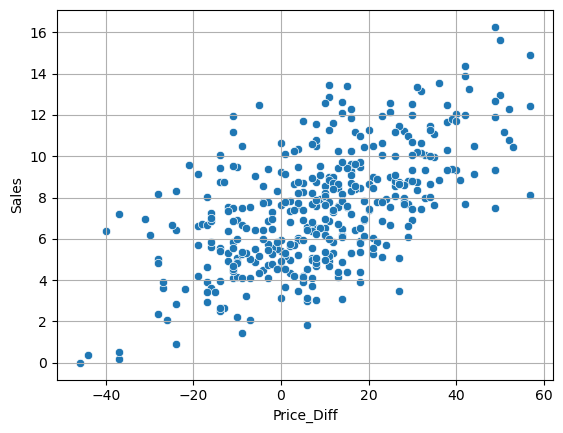

In [19]:
sns.scatterplot(x = 'Price_Diff', y = 'Sales', data = data)
plt.grid()
plt.show()

In [21]:
result = spst.pearsonr(data['Price_Diff'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.5979217124533921, p-value : 3.877120641788767e-40


- 가설이 틀렸음을 알 수 있음
- -> 경쟁사 가격이 판매량과 상관관계가 있는 게 아니라
*경쟁사 가격과 판매가의 차이*(->가격경쟁력)와 판매량과 상관관계가 있는 것!

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

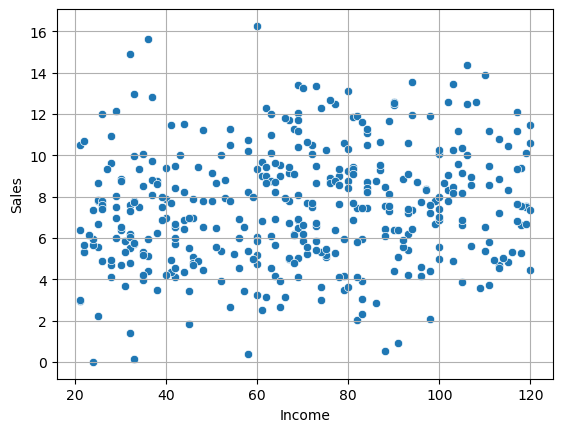

In [22]:
sns.scatterplot(x = 'Income', y = 'Sales', data = data)
plt.grid()
plt.show()

2) 수치화 : 상관분석

In [23]:
result = spst.pearsonr(data['Income'], data['Sales'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517904


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관관계 거의 X

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

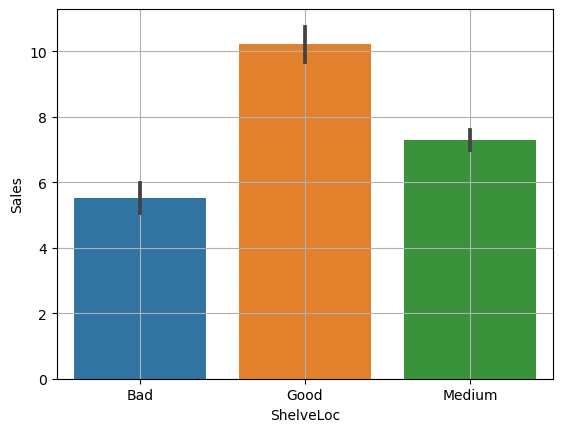

In [24]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [27]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [28]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 진열상태에 따라 판매량의 차이가 큼 -> 진열상태를 개선해야 함

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

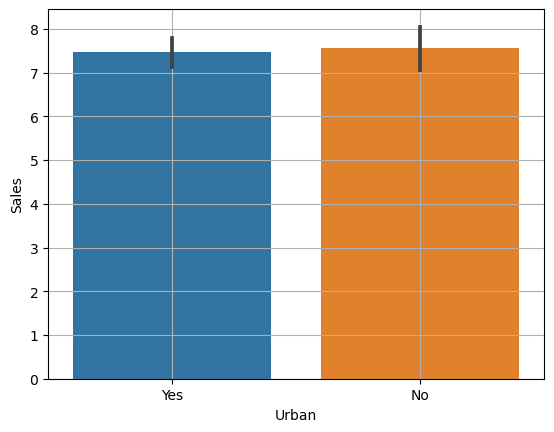

In [29]:
sns.barplot(x='Urban', y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [30]:
urban = data.loc[data['Urban'] == 'Yes', target]
suburban = data.loc[data['Urban'] == 'No', target]

spst.ttest_ind(urban, suburban)

TtestResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 도심에 있든 없든 판매량의 차이는 거의 없음
- 평균도 별 차이가 없고 신뢰구간도 많이 겹침

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

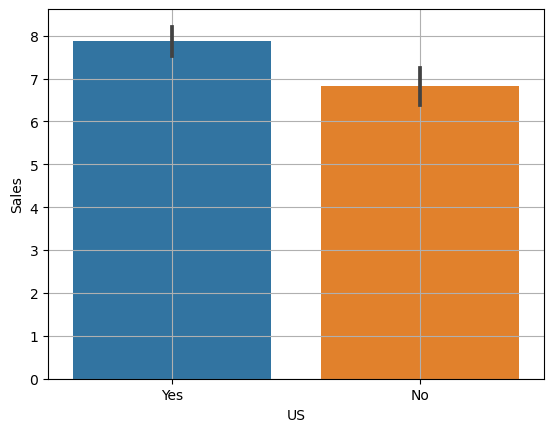

In [31]:
sns.barplot(x='US', y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [32]:
is_us = data.loc[data['US'] == 'Yes', target]
is_not_us = data.loc[data['US'] == 'No', target]

spst.ttest_ind(is_us, is_not_us)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

차이가 있다고 볼 수 있음!

## **4.관계 정리하기**

① 강한관계

경쟁사와의 가격차이, 진열상태

② 중간관계

가격, 도시, 국내외, 광고비

③ 관계없음

인구수, 연령대, 수입

- p-value가 0.05보다 큰 것들
- 그렇다고 지우지 말고,, 모델링할 때 씀
- -> 그 변수가 다른 변수와의 상호관계에 의해 모델 성능에 영향 줄 수도 있으므로 (CompPrice처럼)
- 변수가 너무 많아서 학습할 때 방해된다든가 차원이 너무 커진다든가 그럴 때에나 성능 비교해가며 지움